In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import numpy as np

In [10]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,test_size=0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(120, 4) (120,) (30, 4) (30,)


In [11]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)
print("score train ", arbol.score(X_train, y_train))
print("score test ", arbol.score(X_test, y_test))

score train  1.0
score test  0.933333333333


In [12]:
export_graphviz(arbol, out_file='arbol.dot', class_names=iris.target_names,
               feature_names=iris.feature_names, impurity=False, filled=True)

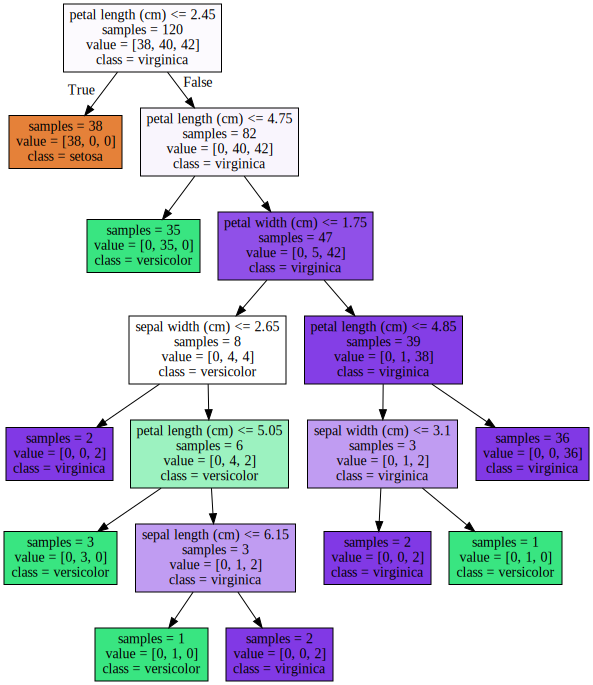

In [13]:
with open('arbol.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

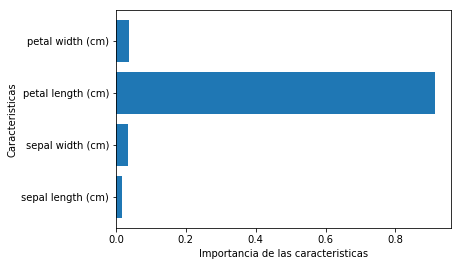

In [14]:
caract = iris.data.shape[1]
plt.barh(range(caract), arbol.feature_importances_)
plt.yticks(np.arange(caract), iris.feature_names)
plt.xlabel('Importancia de las caracteristicas')
plt.ylabel('Caracteristicas')
plt.show()

In [18]:
arbol_2 = DecisionTreeClassifier(max_depth=5)
arbol_2.fit(X_train, y_train)
print("score train ", arbol_2.score(X_train, y_train))
print("score test ", arbol_2.score(X_test, y_test))

score train  0.991666666667
score test  0.933333333333


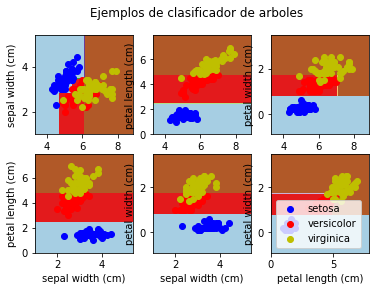

In [21]:
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

for pairidx, pair in enumerate([[0,1], [0,2], [0,3], 
                                [1,2], [1,3],[2,3]]):
    X = iris.data[:, pair]
    y = iris.target
    
    #entrenamos el algoritmo
    clf = DecisionTreeClassifier(max_depth=3).fit(X,y)
    plt.subplot(2,3, pairidx + 1)
    x_min, x_max = X[:, 0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step),
        np.arange(y_min, y_max, plot_step)
    )
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")
    
    #PLot 
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                   cmap=plt.cm.Paired)
    plt.axis("tight")

plt.suptitle("Ejemplos de clasificador de arboles")
plt.legend()
plt.show()
        
    
    